# Musical sentence generator

Given a chord or chord sequence, generates a simple musical phrase

In [1]:
import music21 as ms
from music21 import stream
from music21.note import Note
from music21.chord import Chord
from IPython.display import Audio
import numpy as np

## Setup the score

In [2]:
# create a score
def init_score():
    sc = stream.Score()
    key = ms.key.KeySignature(0)
    meter = ms.meter.TimeSignature('4/4')
    p1 = stream.Part()
    p1.id = 'Part1'
    p2 = stream.Part()
    p2.id = 'Part2'
    
    p1.insert(0, meter)
    p1.insert(0, key)
    p2.insert(0, meter)
    p2.insert(0, key)
    return sc, p1, p2

def gen_score(score, *args ):
    # stream_contents: dict with Part as key and content is a list of notes or chord
    for p in args:
        score.insert(p)
    score.show()
    return score

## Test 1: simple predetermined score over one chord

In [3]:
sc, p1, p2 = init_score()
# chord_duration = ms.duration.Duration(4.0)
# note_duration = ms.duration.Duration(1.0)
chords =["C3 E3 G3"]
notes = ["C4", "E4", "G4", "E4"]

# add_notes(p1, notes, 1.0)
# add_chords(p2, chords, 4.0)
# sc = gen_score(sc,p1, p2)

## Test 2: random chord tones

In [4]:
# my_scale = np.array([0, 2, 4, 5, 7, 9, 11])+5*12
# deg2scale = {1: "C",
#              2: "D",
#              3: "E",
#              4: "F",
#              5: "G",
#              6: "A",
#              7: "B"}
# scale2deg = dict([(v,k) for k, v in deg2scale.items()])
# print(scale2deg)


In [22]:
def get_non_chord_tone(n1, n2, octave):
    # Zero-index to ease calculations
    n1 -= 1
    n2 -= 1
    

    tones = []
    if n2-1 != n1:
        tones.append(n2-1)
    if n2+1 != n1:
        tones.append(n2+1)
    
    # affects the probability
    # passing tones
    if n2-n1==2:
        tones.append((n1+n2)//2) # lower neightbor and passing tone
    if n1-n2==2:
        tones.append((n1+n2)//2) # upper neightbor and passing tone

    # Choose a random non-chord tone    print(tones)
    t = tones[np.random.randint(0,len(tones))]
    if t<0: 
        octave -= 1
    elif t>6:
        octave += 1
    # Back to one-index to ease calculations        
    t = t%7 + 1

    return t, octave

def deg2scale(degree, octave):
    # octave is a reference octave
    scale = ["C", "D", "E", "F", "G", "A", "B"]
    
    degree -= 1
    
    octave += degree//7
    degree = degree%7

    return scale[degree] + str(octave)
    

[5, 5, 1, 3, 2, 5, 2, 4, 8, 3, 3, 8, 8, 4, 8, 8, 5, 5, 8, 10, 5, 7, 5, 9, 5, 1, 1, 5]


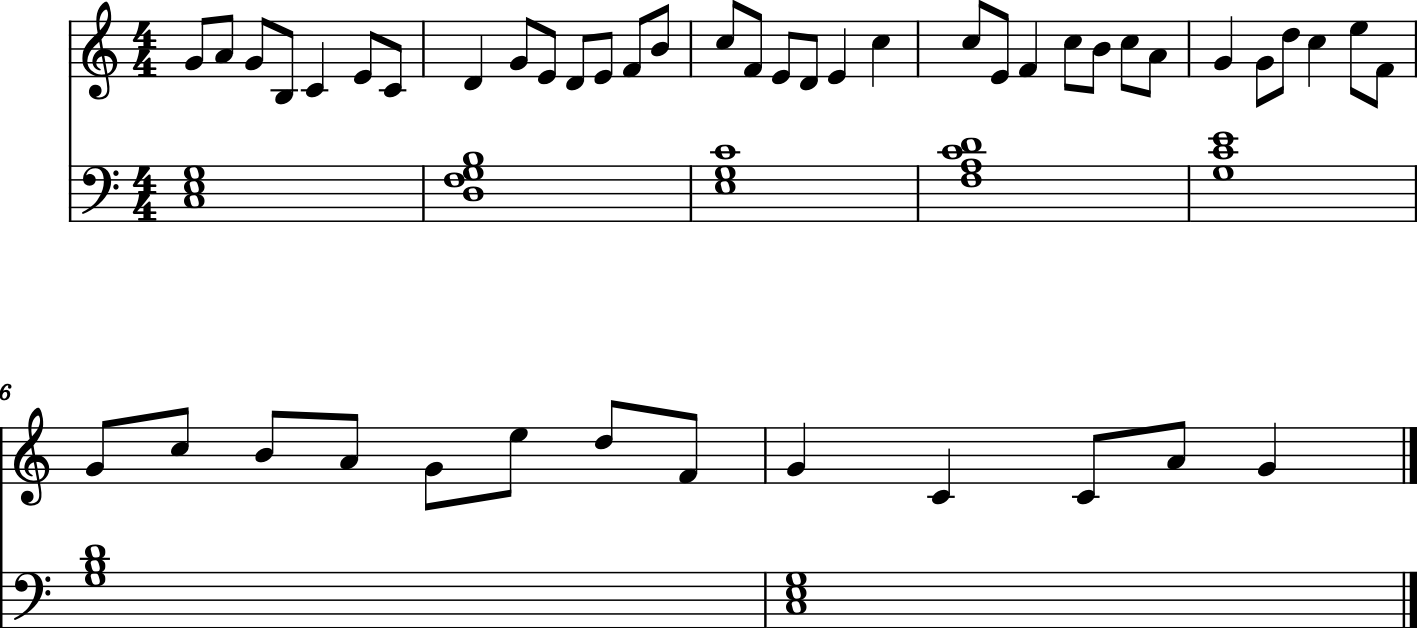

In [38]:
sc, p1, p2 = init_score()

# notes = [deg2scale for i in [1,3,5,3]]
# chords = [[1,3,5],
#           [1,4,6],
#           [1,3,5]]

chords = [[1,3,5],
          [2,4,5,7],
          [3,5,8],
          [4,6,8,9],
          [5,8,10],
          [5,7,9],
          [1,3,5]]

notes = []
rhythm = []
for chord in chords:
    notes += [chord[i] for i in np.random.randint(0,len(chord),size=4)]
    rhythm += list(np.random.randint(1,2+1,size=4))
    # Replace on the quarter by 2 8th notes

print(notes)
rhythm[len(rhythm)//2:] = rhythm[:len(rhythm)//2] # use the same rhythm for both parts    
rhythm[-1] = 1 # subdivision needs the next note to find a passing or neighbor tone
octave = 4

for i in range(len(notes)): 

    if rhythm[i] == 1:
        p1.append(Note(deg2scale(notes[i],octave), quarterLength=1.0))
    elif rhythm[i] == 2:
        nct, nct_octave = get_non_chord_tone(notes[i], notes[i+1], octave)
        p1.append([Note(deg2scale(notes[i],octave),quarterLength=0.5),
                   Note(deg2scale(nct,nct_octave),quarterLength=0.5)])
    else: 
        raise ValueError(f"Unknown subdivision of the beat: {rhythm[i]}")



# add_notes(p1, notes, 1.0)
octave = 3
p2.append([Chord([deg2scale(c, octave) for c in chord], quarterLength=4) for chord in chords])
sc = gen_score(sc,p1, p2)
sc.show("midi")

In [16]:
deg2scale(22,3)

'C3'

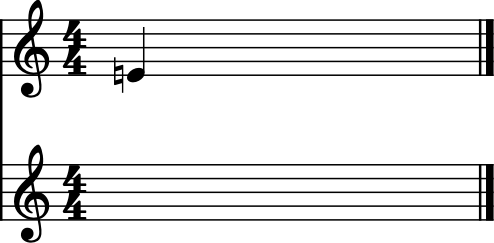

In [176]:
sc, p1, p2 = init_score()
p1.append(Note(64))
sc = gen_score(sc,p1, p2)

In [111]:
a = Note(64)
b = Note("E4")

In [114]:
vars(b)

{'_activeSite': None,
 '_naiveOffset': 0.0,
 '_activeSiteStoredOffset': None,
 '_derivation': None,
 '_style': None,
 '_editorial': None,
 '_duration': <music21.duration.Duration 1.0>,
 '_priority': 0,
 '_cache': {},
 'id': 4704755824,
 'groups': [],
 'sites': <music21.sites.Sites at 0x118811dc0>,
 'lyrics': [],
 'expressions': [],
 'articulations': [],
 'tie': None,
 '_notehead': 'normal',
 '_noteheadFill': None,
 '_noteheadParenthesis': False,
 '_stemDirection': 'unspecified',
 '_volume': None,
 'linkage': 'tie',
 'beams': <music21.beam.Beams>,
 '_storedInstrument': None,
 '_chordAttached': None,
 'pitch': <music21.pitch.Pitch E4>}

In [116]:
a.pitch==b.pitch

False

In [118]:
vars(a.pitch)

{'_groups': None,
 '_step': 'E',
 '_overridden_freq440': None,
 '_accidental': <music21.pitch.Accidental natural>,
 '_microtone': None,
 'defaultOctave': 4,
 '_octave': 4,
 'spellingIsInferred': True,
 'fundamental': None,
 '_client': <music21.note.Note E>}

In [119]:
vars(b.pitch)

{'_groups': None,
 '_step': 'E',
 '_overridden_freq440': None,
 '_accidental': None,
 '_microtone': None,
 'defaultOctave': 4,
 '_octave': 4,
 'spellingIsInferred': False,
 'fundamental': None,
 '_client': <music21.note.Note E>}